# Sentiment Analysis for Amazon Product Review

In [1]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from imblearn.over_sampling import SMOTE 
import pickle
from nltk.corpus import stopwords
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,f1_score
from sklearn.model_selection import GridSearchCV

In [3]:
data = pd.read_csv("Amazon Product review.csv")
data.head(20)

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams
5,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,NaN,http://www.amazon.com/Kindle-Paperwhite-High-R...,"My previous kindle was a DX, this is my second...",Great device for reading. 8 people found this ...,NaN,NaN,Kelvin Law,NaN,NaN,205 grams
6,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,NaN,http://www.amazon.com/Kindle-Paperwhite-High-R...,Allow me to preface this with a little history...,One Simply Could Not Ask For More 28 people fo...,NaN,NaN,Ricky,NaN,NaN,205 grams
7,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,NaN,http://www.amazon.com/Kindle-Paperwhite-High-R...,Just got mine right now. Looks the same as the...,Definitely better than the previous generation...,NaN,NaN,Bandler,NaN,NaN,205 grams
8,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,NaN,http://www.amazon.com/Kindle-Paperwhite-High-R...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets! 16 people found...",NaN,NaN,Cristina M,NaN,NaN,205 grams
9,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,NaN,http://www.amazon.com/Kindle-Paperwhite-High-R...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader 19 ...,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams


In [4]:
data.shape

(1597, 27)

In [5]:
data.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')

In [6]:
data.brand.unique()

array(['Amazon', 'Moshi'], dtype=object)

In [16]:
#creating new dataframe of required features
df = data[['reviews.rating','reviews.text','reviews.title']]
df.tail(30)

,reviews.rating,reviews.text,reviews.title
1567,NaN,I bought these for a couple of reasons.br /br ...,I hate having to shove headphones into my brai...
1568,2.0,My remote went out just a couple weeks after w...,Shouldn't have to settle for a Phone App or pa...
1569,5.0,Works great! Originally it had a delivery date...,Works great! Originally it had a delivery date...
1570,5.0,"Well what to say This is a replacement remote,...",Great second remote
1571,4.0,Remote worked well for about 30 minutes but no...,Disappointed - UPDATE
1572,3.0,A remote this small and black is begging to be...,Download the remote app instead and control Fi...
1573,3.0,It blows my mind theres not a class action law...,Decent replacement for something that shouldnt...
1574,5.0,It's small and I don't miss voice interface. T...,This is a great inexpensive way to add 2nd rem...
1575,1.0,I don't know what's wrong with fire tv remotes...,Amazon fire tv remote sucks!
1576,1.0,I don't know what's wrong with fire tv remotes...,Amazon fire tv remote sucks!


In [18]:
df['reviews.text'][1596]

'I ordered this item to replace the one that no longer works. The directions for the new remove state to press the home button to go to the home screen (using the existing remote which does not work) You must use your existing remote for all the following steps. The existing remote DOES NOT WORK. This is why I bought a new one. I am sending all of this crap back to amazon and canceling this Fire subscription. This has been a problem from day one and we have only had this for a few months. Not worth the money.'

In [9]:
df['reviews.rating'].value_counts()

reviews.rating
5.0    741
4.0    236
3.0    124
1.0     42
2.0     34
Name: count, dtype: int64

In [10]:
df['reviews.rating'].isna().sum()

420

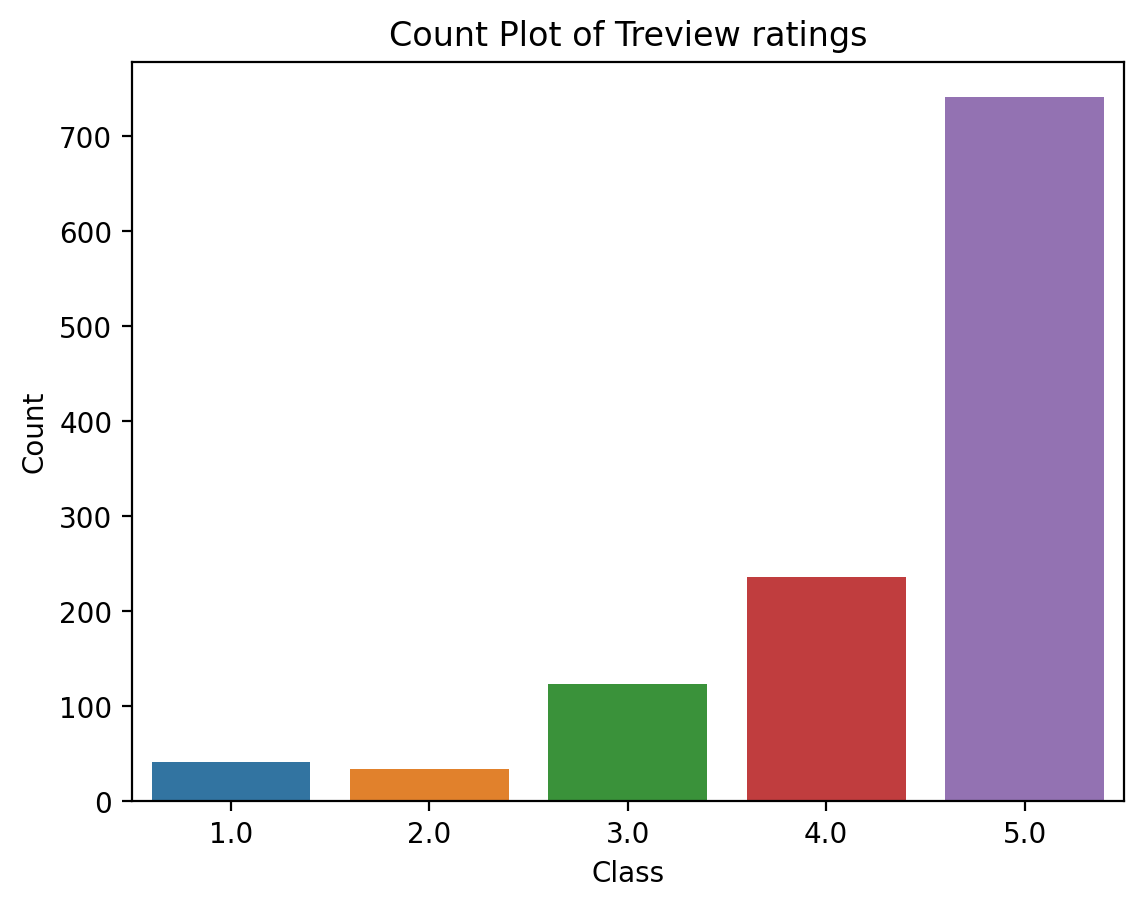

In [11]:
sns.countplot(x='reviews.rating',data=df)
plt.title('Count Plot of Treview ratings')
plt.xlabel('Class')
plt.ylabel('Count')

# Display the plot
plt.show()

**Above figure shows huge class imbalance , hence need to do over sampling**

In [12]:
df['review_text']=df['reviews.title'].str.cat(data['reviews.text'], sep='.')
new_df = df[['review_text','reviews.rating']]
new_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_1448\2881522103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_text']=df['reviews.title'].str.cat(data['reviews.text'], sep='.')


,review_text,reviews.rating
0,"Paperwhite voyage, no regrets!.I initially had...",5.0
1,One Simply Could Not Ask For More.Allow me to ...,5.0
2,Great for those that just want an e-reader.I a...,4.0
3,Love / Hate relationship.I bought one of the f...,5.0
4,I LOVE IT.I have to say upfront - I don't like...,5.0
...,...,...
1592,I would be disappointed with myself if i produ...,3.0
1593,Battery draining remote!!!!.I have had to chan...,1.0
1594,replacing an even worse remote. Waste of time....,1.0
1595,Overpriced.It does the job but is super over p...,3.0


In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review_text     1580 non-null   object 
 1   reviews.rating  1177 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.1+ KB


In [14]:
#function to remove punctuations out of text
def remove_punctuation(text):
    import string
    if isinstance(text, str):
        translator = str.maketrans('', '', string.punctuation)
        return text.translate(translator)
    return text    

In [15]:
new_df['filtered_reviews'] = new_df['review_text'].apply(remove_punctuation)
new_df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1448\93669979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['filtered_reviews'] = new_df['review_text'].apply(remove_punctuation)


,review_text,reviews.rating,filtered_reviews
0,"Paperwhite voyage, no regrets!.I initially had...",5.0,Paperwhite voyage no regretsI initially had tr...
1,One Simply Could Not Ask For More.Allow me to ...,5.0,One Simply Could Not Ask For MoreAllow me to p...
2,Great for those that just want an e-reader.I a...,4.0,Great for those that just want an ereaderI am ...
3,Love / Hate relationship.I bought one of the f...,5.0,Love Hate relationshipI bought one of the fir...
4,I LOVE IT.I have to say upfront - I don't like...,5.0,I LOVE ITI have to say upfront I dont like co...


In [16]:
#removing null values out of dataset
null_values_df = new_df[new_df[['filtered_reviews', 'reviews.rating']].isna().all(axis=1)]
print(null_values_df)

    review_text  reviews.rating filtered_reviews
788         NaN             NaN              NaN
793         NaN             NaN              NaN
794         NaN             NaN              NaN
795         NaN             NaN              NaN
796         NaN             NaN              NaN
797         NaN             NaN              NaN
798         NaN             NaN              NaN
802         NaN             NaN              NaN
803         NaN             NaN              NaN
806         NaN             NaN              NaN
808         NaN             NaN              NaN
809         NaN             NaN              NaN
810         NaN             NaN              NaN
812         NaN             NaN              NaN
815         NaN             NaN              NaN
816         NaN             NaN              NaN
819         NaN             NaN              NaN


**All the data columns having null values are removed**

In [17]:
new_df = new_df.dropna(subset=['filtered_reviews', 'reviews.rating','review_text'], how='all')
new_df.isna().any()

review_text         False
reviews.rating       True
filtered_reviews    False
dtype: bool

In [18]:
new_df.shape

(1580, 3)

In [19]:
# adding a sentiment column to classify reviews as Positive or Negative
# Positive = 1
# Negative = 0
new_df['sentiment'] = np.where(new_df['reviews.rating'] == 5.0 , 1 , np.where(new_df['reviews.rating'] == 4.0 , 1,0))
new_df.head()                               

C:\Users\Admin\AppData\Local\Temp\ipykernel_1448\3939531704.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['sentiment'] = np.where(new_df['reviews.rating'] == 5.0 , 1 , np.where(new_df['reviews.rating'] == 4.0 , 1,0))


,review_text,reviews.rating,filtered_reviews,sentiment
0,"Paperwhite voyage, no regrets!.I initially had...",5.0,Paperwhite voyage no regretsI initially had tr...,1
1,One Simply Could Not Ask For More.Allow me to ...,5.0,One Simply Could Not Ask For MoreAllow me to p...,1
2,Great for those that just want an e-reader.I a...,4.0,Great for those that just want an ereaderI am ...,1
3,Love / Hate relationship.I bought one of the f...,5.0,Love Hate relationshipI bought one of the fir...,1
4,I LOVE IT.I have to say upfront - I don't like...,5.0,I LOVE ITI have to say upfront I dont like co...,1


In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
sw = stopwords.words('english')
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [22]:
def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)

In [23]:
new_df['filtered_reviews'] = new_df['filtered_reviews'].apply(stopwords)
new_df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1448\1138817381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['filtered_reviews'] = new_df['filtered_reviews'].apply(stopwords)


,review_text,reviews.rating,filtered_reviews,sentiment
0,"Paperwhite voyage, no regrets!.I initially had...",5.0,paperwhite voyage regretsi initially trouble d...,1
1,One Simply Could Not Ask For More.Allow me to ...,5.0,one simply could ask moreallow preface little ...,1
2,Great for those that just want an e-reader.I a...,4.0,great want ereaderi enjoying far great reading...,1
3,Love / Hate relationship.I bought one of the f...,5.0,love hate relationshipi bought one first paper...,1
4,I LOVE IT.I have to say upfront - I don't like...,5.0,love iti say upfront dont like coroporate herm...,1


In [24]:
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
x_resampled = count_vectorizer.fit_transform(new_df['filtered_reviews'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [25]:
dictionary

dict_items([('paperwhite', 5927), ('voyage', 8634), ('regretsi', 6691), ('initially', 4446), ('trouble', 8292), ('deciding', 2499), ('reviews', 6884), ('less', 4876), ('said', 6978), ('thing', 8070), ('great', 3896), ('spending', 7556), ('money', 5333), ('go', 3815), ('voyagefortunately', 8636), ('friends', 3641), ('owned', 5867), ('ended', 3034), ('buying', 1761), ('basis', 1406), ('models', 5316), ('300', 315), ('ppi', 6227), ('80', 739), ('dollar', 2787), ('jump', 4679), ('turns', 8333), ('pricey', 6293), ('voyages', 8640), ('page', 5893), ('press', 6265), ('isnt', 4574), ('always', 1050), ('sensitive', 7125), ('fine', 3441), ('specific', 7546), ('setting', 7155), ('dont', 2798), ('need', 5460), ('auto', 1296), ('light', 4909), ('adjustmentits', 917), ('week', 8735), ('loving', 5057), ('regrets', 6690), ('touch', 8221), ('screen', 7042), ('receptive', 6625), ('easy', 2932), ('use', 8506), ('keep', 4702), ('regardless', 6685), ('time', 8143), ('day', 2471), ('case', 1846), ('hard', 4

In [26]:
vocab = []
count = []
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
vocab_bef_stem = pd.Series(count, index=vocab)
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

In [27]:
vocab_bef_stem

zumi       9002
zooming    9001
zoom       9000
zippy      8999
zip        8998
           ... 
04            4
03mp          3
035           2
034           1
029           0
Length: 9003, dtype: int64

<Axes: >

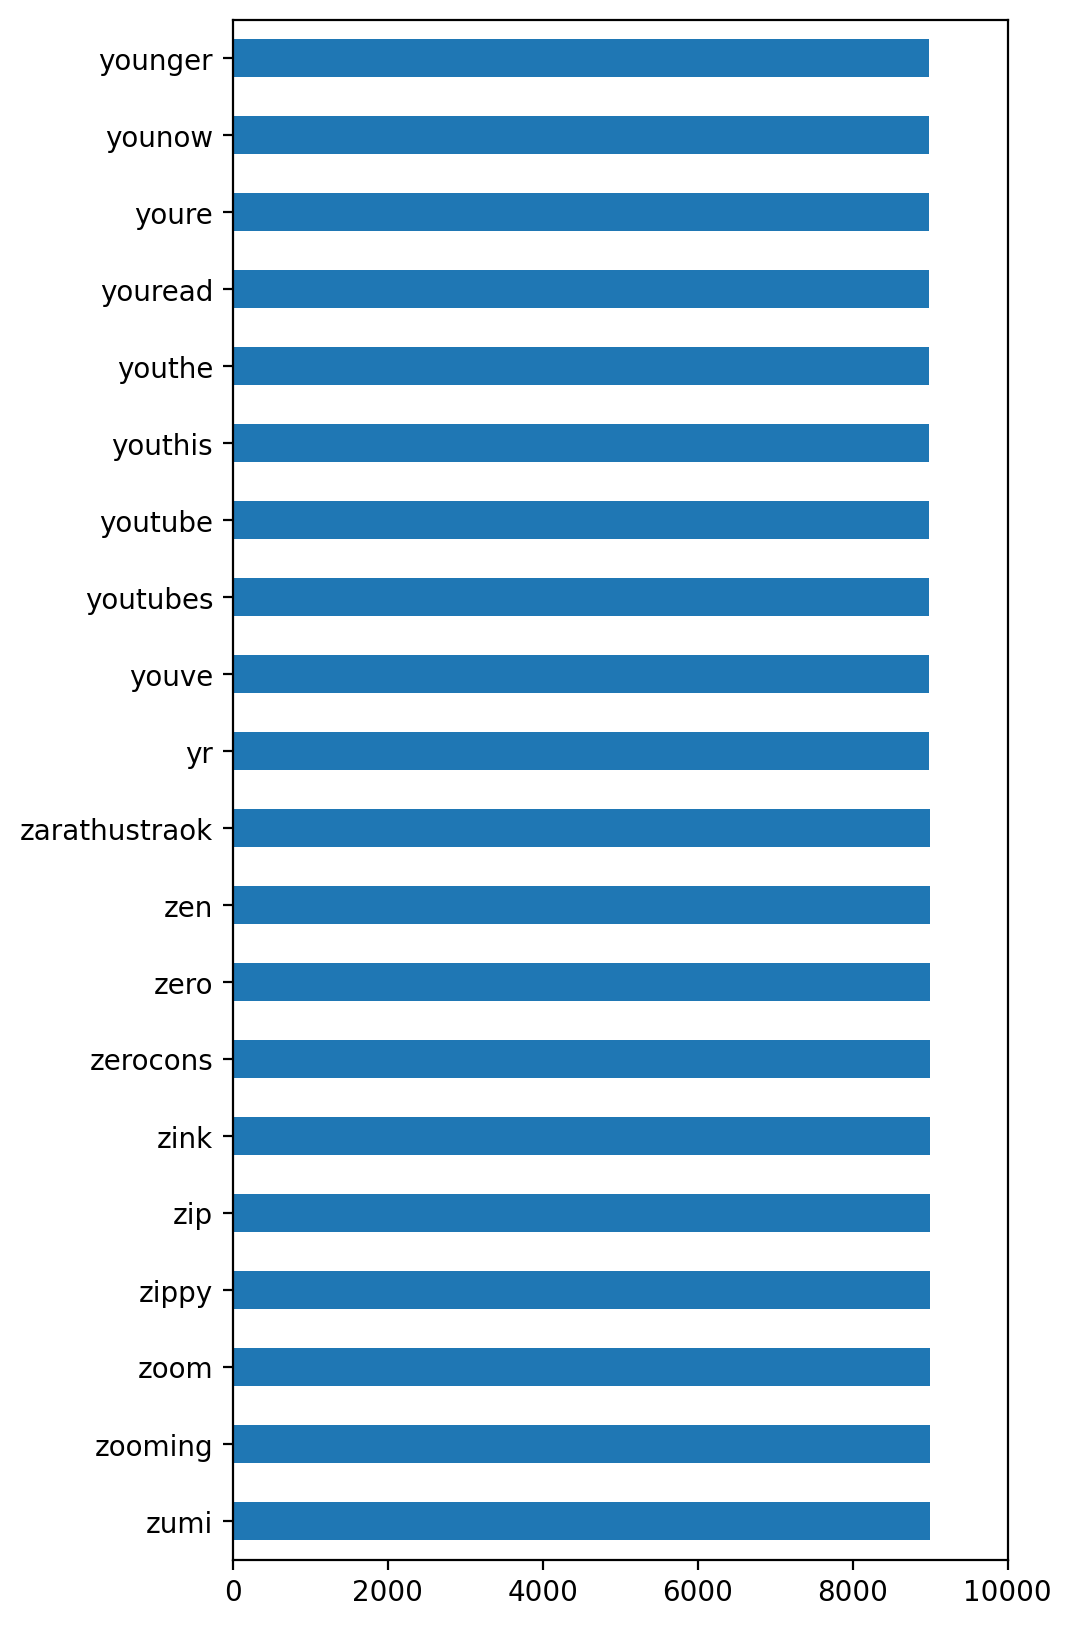

In [28]:
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10),xlim= (0,10000))

***The CountVectorizer creates a sparse matrix where each row represents a document and each column represents a unique word from the vocabulary. The values in this matrix are the counts of the corresponding words in the documents.
The bar plot visualizes the most frequent words in the dataset, showing which words appear most often.***

In [29]:
#Lemmatization is a more sophisticated process that reduces words to their base or dictionary form (lemma).
from nltk.stem import WordNetLemmatizer
import re
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
def lemmatization(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text).lower()
    # Tokenize and lemmatize
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [30]:
new_df['filtered_reviews'] = new_df['filtered_reviews'].apply(lemmatization)
new_df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1448\1515621921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['filtered_reviews'] = new_df['filtered_reviews'].apply(lemmatization)


,review_text,reviews.rating,filtered_reviews,sentiment
0,"Paperwhite voyage, no regrets!.I initially had...",5.0,paperwhite voyage regretsi initially trouble d...,1
1,One Simply Could Not Ask For More.Allow me to ...,5.0,one simply could ask moreallow preface little ...,1
2,Great for those that just want an e-reader.I a...,4.0,great want ereaderi enjoying far great reading...,1
3,Love / Hate relationship.I bought one of the f...,5.0,love hate relationshipi bought one first paper...,1
4,I LOVE IT.I have to say upfront - I don't like...,5.0,love iti say upfront dont like coroporate herm...,1


In [31]:
def length(text):
    return len(text)

In [32]:
new_df['length'] = new_df['filtered_reviews'].apply(length)
new_df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1448\372684930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['length'] = new_df['filtered_reviews'].apply(length)


,review_text,reviews.rating,filtered_reviews,sentiment,length
0,"Paperwhite voyage, no regrets!.I initially had...",5.0,paperwhite voyage regretsi initially trouble d...,1,669
1,One Simply Could Not Ask For More.Allow me to ...,5.0,one simply could ask moreallow preface little ...,1,839
2,Great for those that just want an e-reader.I a...,4.0,great want ereaderi enjoying far great reading...,1,134
3,Love / Hate relationship.I bought one of the f...,5.0,love hate relationshipi bought one first paper...,1,1051
4,I LOVE IT.I have to say upfront - I don't like...,5.0,love iti say upfront dont like coroporate herm...,1,1199


In [33]:
y_nan = new_df[new_df['reviews.rating'].isna()]
new_df = new_df.drop(y_nan.index)

In [34]:
X = new_df['filtered_reviews']
y = new_df['sentiment']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(941,)

***TF-IDF helps to quantify the importance of each word in a document relative to the entire corpus.***

In [36]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True,
strip_accents='ascii', max_features=5000) 
X_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [37]:
# Perform oversampling using SMOTE (or other technique)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y_train)


In [38]:
print(X_resampled.shape)

(1554, 5000)


In [39]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Type of kernel to use
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’
    'degree': [3, 4, 5]  # Degree of the polynomial kernel function (‘poly’). Ignored by other kernels
}

# Initialize the SVC model
svc_model = SVC()

# Initialize the Grid Search model
grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the Grid Search model
grid_search.fit(X_resampled, y_resampled)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy score: {best_score}")

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Parameters: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Best Cross-Validation Accuracy score: 0.9935691318327974


***The best hyperparameters indicate that the SVC model uses a polynomial kernel of degree 3 with moderate regularization (C = 1) and a scaling factor for gamma, aiming to capture non-linear relationships in the data while balancing fit and generalization.***


In [40]:
clf = SVC(random_state=42,**best_params)
clf.fit(X_resampled, y_resampled)
y_pred = clf.predict(tfidf_vectorizer.transform(X_test))
print("Model Accuracy: ",f1_score(y_test,y_pred,average='weighted'))
print("Model Classification Report: ",classification_report(y_pred,y_test))

Model Accuracy:  0.8811696777798472
Model Classification Report:                precision    recall  f1-score   support

           0       0.39      0.88      0.54        16
           1       0.99      0.90      0.94       220

    accuracy                           0.90       236
   macro avg       0.69      0.89      0.74       236
weighted avg       0.95      0.90      0.92       236



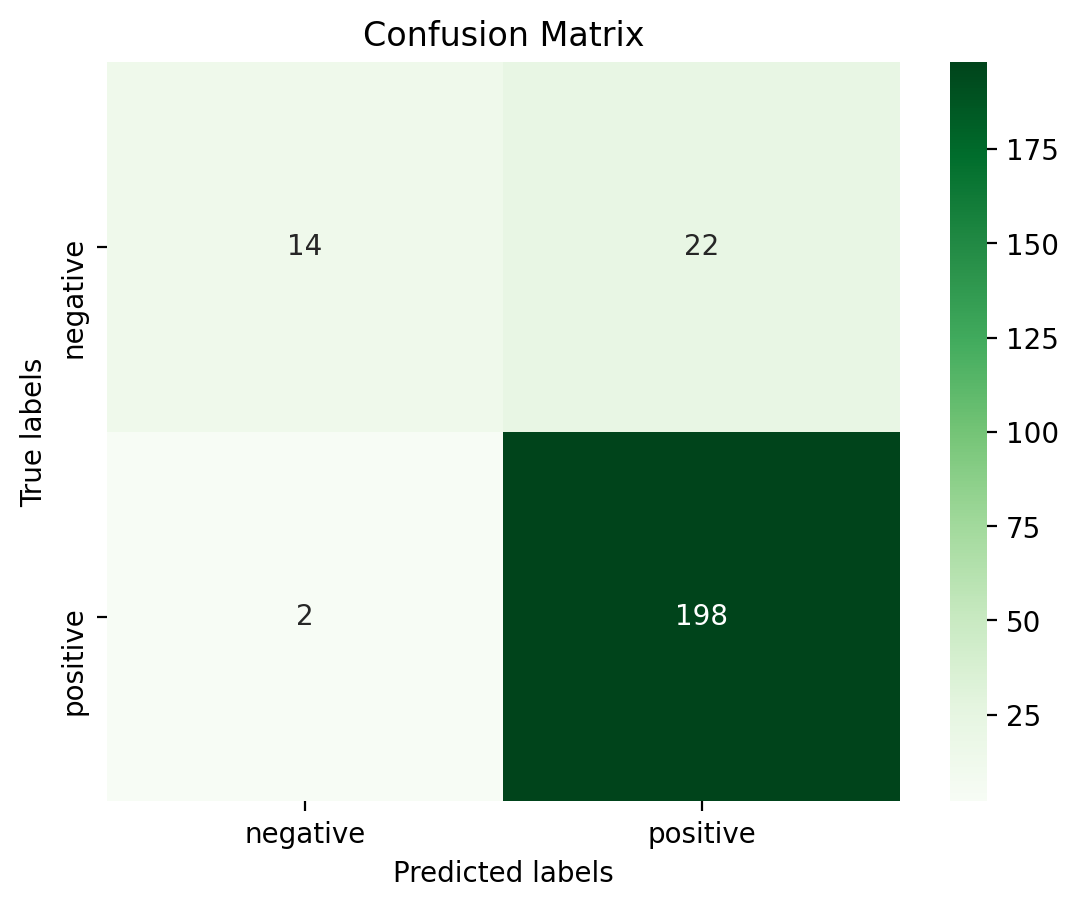

In [41]:
ax= plt.subplot()
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Greens');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [42]:
Testing_Output = X_test
Review = pd.Series(y_pred).replace({1: 'Positive', 0: 'Negative'})

# Create Testing_Output DataFrame and add the 'Review' column
Testing_Output = X_test.copy()
Testing_output = pd.concat([Testing_Output.reset_index(drop=True), Review.reset_index(drop=True)], axis=1)
Testing_output = pd.DataFrame(data=Testing_output)

In [43]:
Testing_output.rename(columns={0:'Review'},inplace=True)

In [44]:
Testing_output


,filtered_reviews,Review
0,provides excellent protection new tap speaksli...,Positive
1,gooddoesnt understand command questionsbut goo...,Positive
2,great controller major problem recommended poi...,Negative
3,sound quality horribleits tin sounding bass so...,Positive
4,thoughtyou need amazon prime plus order specia...,Positive
...,...,...
231,great start smart homethe amazon tap first ste...,Positive
232,nice accessory fire hd a recent fire cover ama...,Positive
233,expected amazon produced productive replacemen...,Negative
234,brought year old granangel brought year old gr...,Positive


In [45]:
sentiment_prediction = Testing_output.to_csv(index=False)

In [46]:
import os

# Define the file path
file_path = os.path.join(os.getcwd(), 'sentiment_prediction.csv')

# Check if the file exists
if os.path.exists(file_path):
    # Append to the existing file
    Testing_output.to_csv(file_path, mode='a', header=False, index=False)
    print(f'Data appended to: {file_path}')
else:
    # Create a new file
    Testing_output.to_csv(file_path, index=False)
    print(f'File created and data saved to: {file_path}')



File created and data saved to: C:\Users\Admin\Downloads\sentiment_prediction.csv


In [50]:
with open('sentiment_analysis_model.pkl', 'wb') as file:
    pickle.dump((clf, tfidf_vectorizer), file)

print("Model and vectorizer have been saved to sentiment_analysis_model.pkl")

Model and vectorizer have been saved to sentiment_analysis_model.pkl
